In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

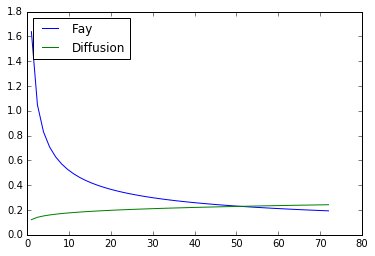

In [5]:
#Compare diffusion and Fay diffusion
k1=1.53
k2=1.21
po = 0.8
pw = 1
delta = (pw-po)/pw
visc_w = 1e-6
vol = 795
t = np.linspace(3600,3600*72)
Dfay = (k2**2)/16 * ((delta * 9.81 *  vol**2)/np.sqrt(visc_w))**(1./3) * 1/np.sqrt(t)
D = 0.033 * t**0.16
plt.plot(t/3600,Dfay,label='Fay')
plt.plot(t/3600,D,label='Diffusion')
plt.legend(loc=2)

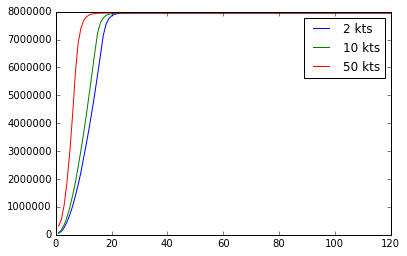

In [6]:
#Compare ADIOS 2 results different winds (no dispersion, emulsion etc)
area_file = 'SlickArea_2kts.txt'
f = file(area_file)
low_wind = np.loadtxt(f,skiprows=2,comments='-')
f.close()
area_file = 'SlickArea_10kts.txt'
f = file(area_file)
mod_wind = np.loadtxt(f,skiprows=2,comments='-')
f.close()
area_file = 'SlickArea_50kts.txt'
f = file(area_file)
hi_wind = np.loadtxt(f,skiprows=2,comments='-')
f.close()
plt.plot(low_wind[:,0],low_wind[:,1],label='2 kts')
plt.plot(mod_wind[:,0],mod_wind[:,1],label='10 kts')
plt.plot(hi_wind[:,0],hi_wind[:,1],label='50 kts')
plt.legend()

In [7]:
#Calculate areas
a0 = (np.pi*(k2**4/k1**2)
              * (((vol)**5*9.81*delta) /
                 (visc_w**2))**(1./6.)) #not used but copied from Jasmine's code just in case...

Afay = np.pi * k2**2 * (delta * 9.81 *  vol**2/np.sqrt(visc_w))**(1./3) * np.sqrt(t)
Adiff = np.pi * 4 * D * t

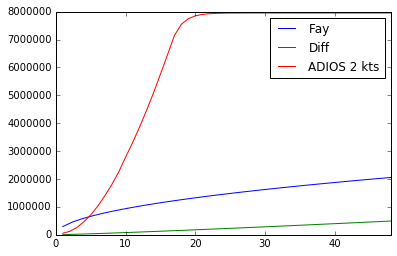

In [8]:
plt.plot(t/3600,Afay,label='Fay')
plt.plot(t/3600,Adiff,label='Diff')
plt.plot(low_wind[:,0],low_wind[:,1],label='ADIOS 2 kts')
plt.xlim(0,48)
plt.legend()